# Aplicação de pré-processamento


A seguir, a implementação de cada um dos filtros: passa-faixa (bandpass), passa-baixa (lowpass), passa-alta (highpass) e corta-faixa (notch).

In [9]:
# import das bibliotecas

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy import signal

In [3]:
# definições de filtros

def butter_bandpass(data, lowcut, highcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)


def butter_lowpass(data, lowcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='lowpass')
    return signal.filtfilt(b, a, data)


def butter_highpass(data, highcut, fs=200, order=4):
    nyq = fs * 0.5
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='highpass')
    return signal.filtfilt(b, a, data)


def butter_notch(data, cutoff, var=1, fs=200, order=4):
    nyq = fs * 0.5
    low = (cutoff - var) / nyq
    high = (cutoff + var) / nyq
    b, a = signal.iirfilter(order, [low, high], btype='bandstop', ftype="butter")
    return signal.filtfilt(b, a, data)

In [6]:
# carregamento e preparação dos dados

data = np.load('datasets/topicos_cc/p1_1_29-03-2022_14:51:01.npy')
data = np.transpose(data, (0, 2, 1))
data.shape

(8, 4, 1600)

### Apresentação do sinal sem a aplicação de nenhum filtro

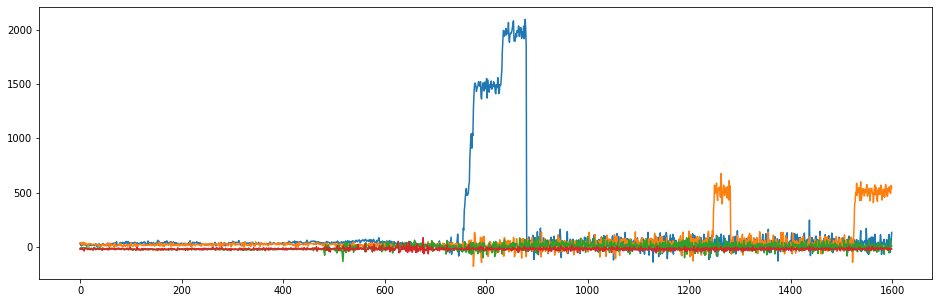

In [10]:
rcParams['figure.figsize'] = [16., 5.]

for i in range(data.shape[1]):
    plt.plot(data[3,i,:])
plt.show()

### Apresentação do sinal com a aplicação do filtro "notch"

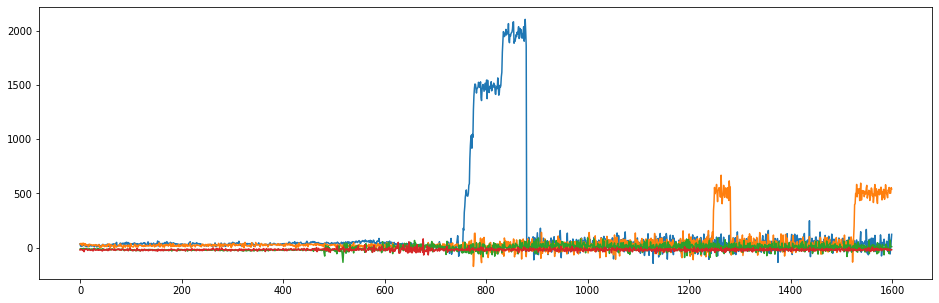

In [11]:
data_filtered = butter_notch(data, 60)
for i in range(data_filtered.shape[1]):
    plt.plot(data_filtered[3,i,:])
plt.show()

### Apresentação do sinal com a aplicação do filtro "bandpass"

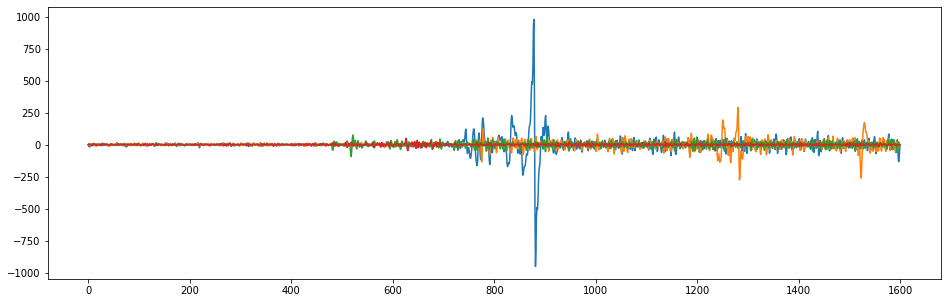

In [12]:
data_filtered = butter_bandpass(data_filtered, 5, 50)
for i in range(data_filtered.shape[1]):
    plt.plot(data_filtered[3,i,:])
plt.show()

### Apresentação do sinal com a aplicação do filtro "notch", seguido por "lowpass" e "highpass"

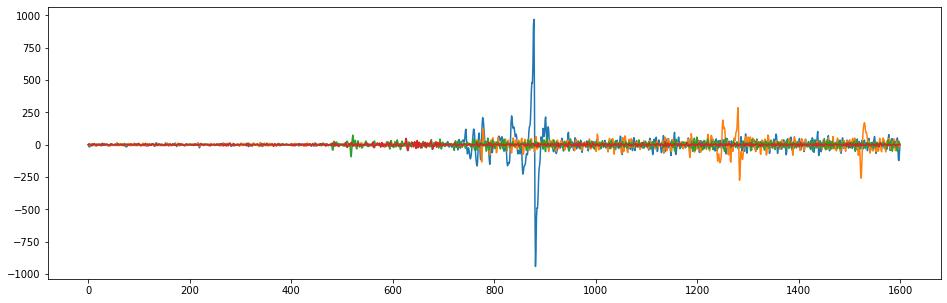

In [13]:
data_filtered = butter_notch(data, 60)
data_filtered = butter_highpass(data_filtered, 5)
data_filtered = butter_lowpass(data_filtered, 50)
for i in range(data_filtered.shape[1]):
    plt.plot(data_filtered[3,i,:])
plt.show()

### Apresentação do sinal com a aplicação do filtro "notch", seguido por "lowpass" e "highpass" 10 vezes

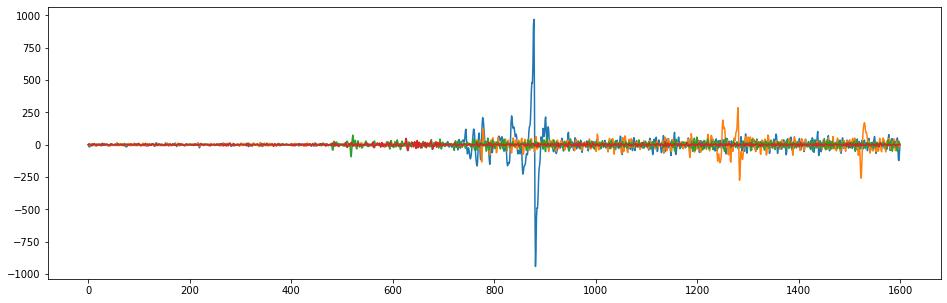

In [14]:
data_filtered = data
for _ in range(10):
    data_filtered = butter_notch(data, 60)
    data_filtered = butter_highpass(data_filtered, 5)
    data_filtered = butter_lowpass(data_filtered, 50)
for i in range(data_filtered.shape[1]):
    plt.plot(data_filtered[3,i,:])
plt.show()

### Mesmos dados acima com eletrodos em gráficos separados

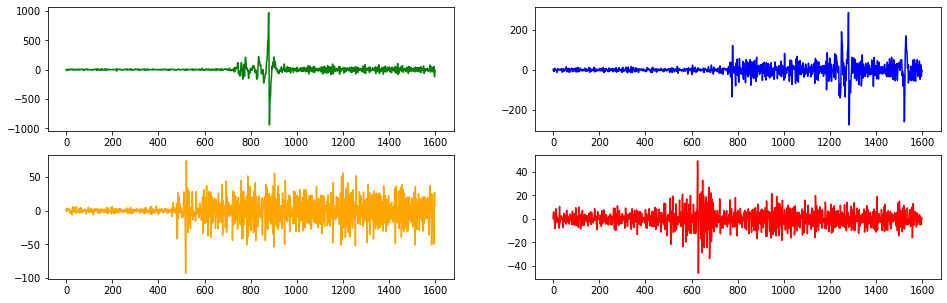

In [15]:
fig, axes = plt.subplots(2, 2)
colors = ('green', 'blue', 'orange', 'red')
for i, ax in enumerate(axes.flatten()):
    ax.plot(data_filtered[3,i,:], color=colors[i])